In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('./data/mergedSalary2.csv')

In [3]:
sal.shape

(2222, 121)

In [4]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]

In [5]:
sal2.shape

(2185, 122)

In [6]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsinposition', 
                                    'yearsinprofession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 
                                    'inst5', 'instbudget', 'instsize', 'median_household_income', 'no_male_hs',
                                    'no_female_hs', 'no_hs', 'at_least_hs_male', 'at_least_hs_female',
                                    'at_least_hs', 'hs_some_college_male', 'hs_some_college_female',
                                    'hs_some_college', 'bachelors_male', 'bachelors_female', 'bachelors',
                                    'at_least_bach_male', 'at_least_bach_female', 'at_least_bach',
                                    'graduate_male', 'graduate_female', 'graduate', 'hispanic', 'white',
                                    'black', 'native_american', 'asian_api', 'two_race_or_more',
                                    'asian_api_total', 'latino_total', 'white_total', 'native_american_total',
                                    'two_race_or_more_total', 'male_unemployment', 'female_unemployment',
                                    'renter', 'owner', 'median_rent', 'Sex.by.Age..Male.',
                                    'Sex.by.Age..Male..Under.5.years', 'Sex.by.Age..Male..5.to.9.years',
                                    'Sex.by.Age..Male..10.to.14.years', 'Sex.by.Age..Male..15.to.17.years',
                                    'Sex.by.Age..Male..18.and.19.years', 'Sex.by.Age..Male..20.years',
                                    'Sex.by.Age..Male..21.years', 'Sex.by.Age..Male..22.to.24.years',
                                    'Sex.by.Age..Male..25.to.29.years', 'Sex.by.Age..Male..30.to.34.years',
                                    'Sex.by.Age..Male..35.to.39.years', 'Sex.by.Age..Male..40.to.44.years',
                                    'Sex.by.Age..Male..45.to.49.years', 'Sex.by.Age..Male..50.to.54.years',
                                    'Sex.by.Age..Male..55.to.59.years', 'Sex.by.Age..Male..60.and.61.years',
                                    'Sex.by.Age..Male..62.to.64.years', 'Sex.by.Age..Male..65.and.66.years',
                                    'Sex.by.Age..Male..67.to.69.years', 'Sex.by.Age..Male..70.to.74.years',
                                    'Sex.by.Age..Male..75.to.79.years', 'Sex.by.Age..Male..80.to.84.years',
                                    'Sex.by.Age..Male..85.years.and.over', 'Sex.by.Age..Female.',
                                    'Sex.by.Age..Female..Under.5.years', 'Sex.by.Age..Female..5.to.9.years',
                                    'Sex.by.Age..Female..10.to.14.years', 'Sex.by.Age..Female..15.to.17.years', 
                                    'Sex.by.Age..Female..18.and.19.years', 'Sex.by.Age..Female..20.years',
                                    'Sex.by.Age..Female..22.to.24.years', 'Sex.by.Age..Female..25.to.29.years',
                                    'Sex.by.Age..Female..30.to.34.years', 'Sex.by.Age..Female..35.to.39.years',
                                    'Sex.by.Age..Female..40.to.44.years', 'Sex.by.Age..Female..45.to.49.years',
                                    'Sex.by.Age..Female..50.to.54.years', 'Sex.by.Age..Female..55.to.59.years',
                                    'Sex.by.Age..Female..60.and.61.years', 'Sex.by.Age..Female..62.to.64.years',
                                    'Sex.by.Age..Female..65.and.66.years', 'Sex.by.Age..Female..67.to.69.years',
                                    'Sex.by.Age..Female..70.to.74.years', 'Sex.by.Age..Female..75.to.79.years',
                                    'Sex.by.Age..Female..80.to.84.years', 'Sex.by.Age..Female..85.years.and.over',
                                    'full_time', 'part_time', 'foreign_born', 'US_born', 'married', 'divorced',
                                    'poverty']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['function', 'gender', 'race', 'highestdegree', 'category', 'insttype']
X_categorical = sal2[X_categorical_features]

In [7]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

function_dummies = pd.get_dummies(X_categorical['function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestDegree_dummies = pd.get_dummies(X_categorical['highestdegree'])
category_dummies = pd.get_dummies(X_categorical['category'])
instType_dummies = pd.get_dummies(X_categorical['insttype'])

# convert to ndarray
X_dummy_features = pd.concat([function_dummies, gender_dummies, race_dummies, highestDegree_dummies, 
                              category_dummies, instType_dummies], axis=1)

In [8]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [9]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [10]:
sal2.head(2)

,Unnamed: 0,zip,function,sup1,sup2,sup3,sup4,sup5,salary,gender,...,Sex.by.Age..Female..80.to.84.years,Sex.by.Age..Female..85.years.and.over,full_time,part_time,foreign_born,US_born,married,divorced,poverty,missingSalary
0,1,1003,position1,4,4,0,0,0,77308.0,M,...,7634,10247,68.4447,31.5553,8.83443,91.16557,42.023943,10.485747,16.801532,False
1,2,1003,position15,0,2,0,60,0,38120.0,M,...,7634,10247,68.4447,31.5553,8.83443,91.16557,42.023943,10.485747,16.801532,False


In [11]:
# y is salary
y = sal2.loc[:, ['salary']].values

In [15]:
y[0:10]

array([[ 77308.],
       [ 38120.],
       [ 55335.],
       [ 70863.],
       [ 56557.],
       [ 48489.],
       [ 55557.],
       [ 38120.],
       [ 40500.],
       [ 40500.]])

In [16]:
# check imputed values
np.isnan(X_numeric_imputed).sum()

0

In [17]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [18]:
# create training and test sets for linear regression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [19]:
# import models for Ridge, Lasso, Linear Regression
from sklearn import datasets, linear_model
# import for polynomial fitting
from sklearn.preprocessing import PolynomialFeatures

Intercept: 
 [-379632.41650789]
Coefficients: 
 [[  7.99987077e+01  -1.11186472e+04  -1.43584495e+04  -1.47122545e+04
   -8.02352502e+03  -5.99690880e+03  -1.35935160e+04  -1.56104409e+04
   -1.21949106e+04  -5.92698519e+03  -1.02152663e+04  -6.94027011e+03
   -1.50243194e+04  -1.64154944e+04  -1.18389772e+04  -1.53954352e+04
   -1.32077126e+04  -1.64061768e+04  -1.58796997e+04  -1.37026993e+04
   -6.56021133e+03  -6.79141616e+03  -1.24218624e+04  -1.03562255e+04
   -1.30891246e+04  -1.15304917e+04  -1.16450332e+04  -1.43573902e+04
   -2.24091883e+03  -3.81343271e+03   2.40106535e+03   5.67985001e+03
    3.43284369e+03   5.30703006e+03   6.87732441e+02   1.30735692e+04
    5.69981087e+03   2.33042824e+03   5.08529982e+03   1.63628802e+04
    9.18466012e+03  -2.66656435e+03  -1.14786267e+03   1.14786268e+03
    8.05321871e+03   6.19608480e+03   1.74063024e+03   5.18617220e+02
    1.07946020e+02  -3.23500654e+00   1.03955875e+01   1.70561561e+03
    5.16326823e+01   3.36548779e+02   2.40

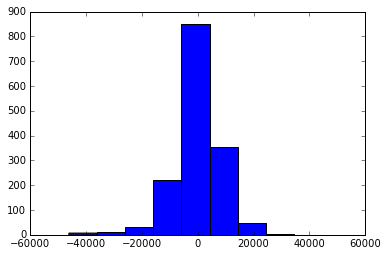

Distribution of prediction error on test data:


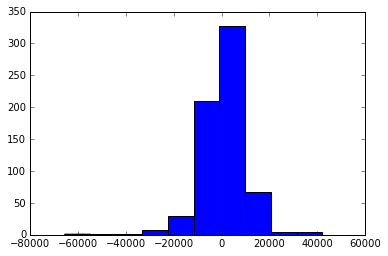

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# Create residual plot to check for non random patterns in errors
# This checks for things like multicollinearity
# y_train_pred = regr.predict(X_train)
# y_test_pred = regr.predict(X_test)

# plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
# plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='uppper left')
# plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
# plt.xlim([-10, 50])
# plt.show()

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)


# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))

# More accurate variance score generated from the adjusted R-squared
# Every time a predictor is added to the model, the R-squared increases no matter what
# Adjusted R-squared takes into account number of predictor variables P
# and number of observations N
# to do: add adj score

#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [21]:
# create training and test sets for polynomial linear regression
from sklearn.cross_validation import train_test_split

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)


Intercept: 
 [-112162.54339358]
Coefficients: 
 [[   89.10364283  7402.55157769  6125.7686404  ...,    41.03348194
     53.33820776   -16.27115801]]
Residual sum of squares, training data: 0.00
Residual sum of squares, test data: 20288367896.33
Variance score, training data: 1.00
Distribution of prediction error on training data:


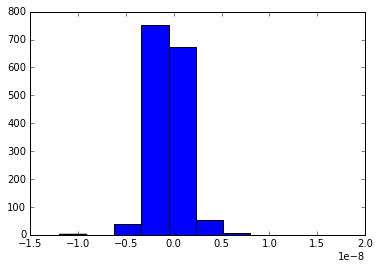

Distribution of prediction error on test data:


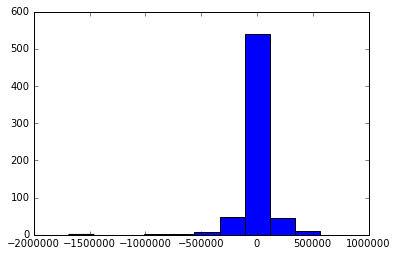

In [22]:
## POLYNOMINAL 


# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# Create residual plot 
# y_train_pred = poly.predict(X_train)
# y_test_pred = poly.predict(X_test)

# plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
# plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='uppper left')
# plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
# plt.xlim([-10, 50])
# plt.show()

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [23]:
# create training and test sets for Ridge regression
# Ridge adds additional regularization
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Intercept: 
 [-223981.32884086]
Coefficients: 
 [[  9.17662508e+03  -1.48427561e+03  -4.76159231e+03  -5.00586340e+03
    1.35474283e+03   3.34130258e+03  -4.03671901e+03  -5.50892822e+03
   -2.52039746e+03   2.45682078e+03  -6.25462936e+02   2.21295287e+03
   -5.35626127e+03  -6.33276078e+03  -2.33165716e+03  -4.66339564e+03
   -3.06485927e+03  -6.94248390e+03  -3.10867838e+03  -4.15500998e+03
    1.53209247e+03   2.60500656e+03  -2.90315133e+03  -8.34182389e+02
   -3.45023315e+03  -2.12535919e+03  -2.02002206e+03  -4.79250667e+03
    1.48512850e+03  -4.70528818e+01  -3.62685344e+02   2.83643681e+03
    7.67000354e+02   2.63333038e+03  -1.85859664e+03   8.21473972e+03
    2.76217911e+03  -1.15305840e+03   1.58671388e+03   1.23354830e+04
    5.76825820e+03  -6.03952688e+03   4.75973734e+02  -4.75973734e+02
    5.02212075e+03   2.87071921e+03   1.76907332e+03   5.05921835e+02
    1.10938591e+02  -3.79925227e+00   9.74671370e+00   1.73982045e+03
    3.36235224e+01   3.57760701e+02   2.40

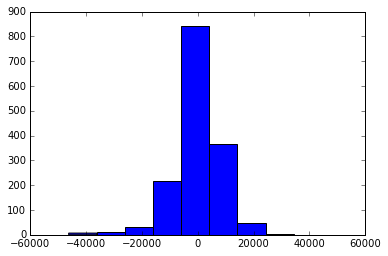

Distribution of prediction error on test data:


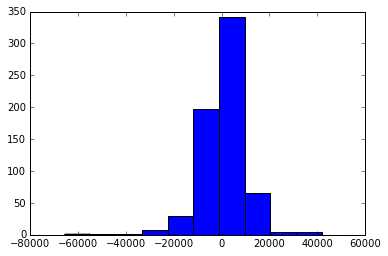

In [24]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# Create linear regression object
ridge_regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
ridge_regr.fit(X_train, y_train)

# Create residual plot 
# y_train_pred = ridge_regr.predict(X_train)
# y_test_pred = ridge_regr.predict(X_test)

# plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
# plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='uppper left')
# plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
# plt.xlim([-10, 50])
# plt.show()

# The intercept
print('Intercept: \n', ridge_regr.intercept_)
# The coefficients
print('Coefficients: \n', ridge_regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((ridge_regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((ridge_regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((ridge_regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % ridge_regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = ridge_regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = ridge_regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [25]:
# create training and test sets for Lasso model
# Ridge adds additional regularization
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Intercept: 
 [ 23728.96941557]
Coefficients: 
 [  7.38021632e+02  -1.03467013e+04  -1.35325698e+04  -1.40659438e+04
  -7.54631798e+03  -4.48951820e+03  -1.28021670e+04  -1.52966850e+04
  -1.13288957e+04  -4.81500343e+03  -9.18789153e+03  -7.20936846e+03
  -1.40472754e+04  -1.49625560e+04  -1.12420075e+04  -1.42304602e+04
  -1.25167579e+04  -1.60748389e+04  -1.41637601e+04  -1.42205283e+04
  -5.02842705e+03  -5.42914820e+03  -1.19067531e+04  -9.83635697e+03
  -1.24817240e+04  -1.02055040e+04  -1.05382732e+04  -1.37956058e+04
  -2.13962949e+03  -3.66779726e+03   2.62215342e+03   5.45634983e+03
   3.46991116e+03   5.08888967e+03   5.69920304e+02   1.22002222e+04
   4.77607638e+03   1.77329643e+03   4.75030875e+03   1.53171527e+04
   8.89793132e+03  -2.65276113e+03  -1.91126763e+03   1.14921620e-11
   8.64974342e+03   7.00419747e+03   1.70158246e+03   5.12396765e+02
   4.49135537e+01  -1.65054073e+00   2.50373765e+01   1.18200949e+03
   7.69453686e+01   3.27029050e+02   2.36903762e+02   2.

/Users/charliePro/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


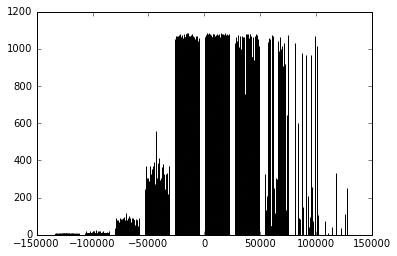

Distribution of prediction error on test data:


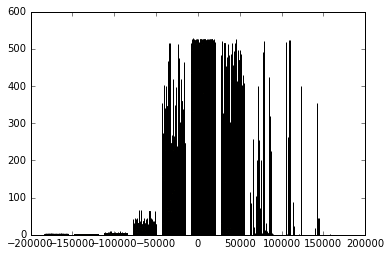

In [26]:
## LASSO
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

las = linear_model.Lasso(alpha=0.1)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
las.fit(X_train, y_train)

# Create residual plot 
# y_train_pred = las.predict(X_train)
# y_test_pred = las.predict(X_test)

# plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
# plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='uppper left')
# plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
# plt.xlim([-10, 50])
# plt.show()

# The intercept
print('Intercept: \n', las.intercept_)
# The coefficients
print('Coefficients: \n', las.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((las.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((las.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((las.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % las.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = las.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = las.predict(X_test) - y_test
plt.hist(predError)
plt.show()